## Part 1_Logistic Regression to Classify Customers as Purchasers

## 1. Data Preparation

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart,  liftChart
from dmba.metric import AIC_score

In [2]:
Tayko_df = pd.read_csv('Tayko.csv')

In [3]:
#Show the shape
Tayko_df.shape

(2000, 25)

In [4]:
#Show some records
Tayko_df.head(10)

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0
5,6,1,0,0,0,0,0,0,0,0,...,0,0,1,1995,2002,0,0,1,0,0
6,7,1,0,0,0,0,0,0,0,0,...,0,1,2,1498,1529,0,0,1,0,0
7,8,1,0,0,1,0,0,0,0,0,...,0,0,1,3397,3397,0,1,0,0,0
8,9,1,1,0,0,0,0,0,0,0,...,0,0,4,525,2914,1,1,0,1,489
9,10,1,1,0,0,0,0,0,0,0,...,0,0,1,3215,3215,0,0,0,1,174


The dataset provides the Tayko customers’ information. It includes 2,000 records and 25 fields.

In [5]:
#List data types of the variables
Tayko_df.dtypes

sequence_number         int64
US                      int64
source_a                int64
source_c                int64
source_b                int64
source_d                int64
source_e                int64
source_m                int64
source_o                int64
source_h                int64
source_r                int64
source_s                int64
source_t                int64
source_u                int64
source_p                int64
source_x                int64
source_w                int64
Freq                    int64
last_update_days_ago    int64
1st_update_days_ago     int64
Web order               int64
Gender=male             int64
Address_is_res          int64
Purchase                int64
Spending                int64
dtype: object

The category variables have been transformed to binary variables and now all the variables are numerical variables, so we don't need to create dummy variables for this database.

In [6]:
#Preliminary Exploration - view the data: rename all column names - replace space with underscore
Tayko_df.columns = [c.replace(' ', '_') for c in Tayko_df.columns]
Tayko_df = Tayko_df.rename(columns={'1st_update_days_ago': 'first_update_days_ago','Gender=male':'Gender_male'})

In [7]:
Tayko_df.head(10)

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,first_update_days_ago,Web_order,Gender_male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0
5,6,1,0,0,0,0,0,0,0,0,...,0,0,1,1995,2002,0,0,1,0,0
6,7,1,0,0,0,0,0,0,0,0,...,0,1,2,1498,1529,0,0,1,0,0
7,8,1,0,0,1,0,0,0,0,0,...,0,0,1,3397,3397,0,1,0,0,0
8,9,1,1,0,0,0,0,0,0,0,...,0,0,4,525,2914,1,1,0,1,489
9,10,1,1,0,0,0,0,0,0,0,...,0,0,1,3215,3215,0,0,0,1,174


In [8]:
#Look at descriptive statistics
Tayko_df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,first_update_days_ago,Web_order,Gender_male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.62500
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.78261
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,2.00000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,153.00000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.00000


In [9]:
#Count of Missing values
Tayko_df.isnull().sum()

sequence_number          0
US                       0
source_a                 0
source_c                 0
source_b                 0
source_d                 0
source_e                 0
source_m                 0
source_o                 0
source_h                 0
source_r                 0
source_s                 0
source_t                 0
source_u                 0
source_p                 0
source_x                 0
source_w                 0
Freq                     0
last_update_days_ago     0
first_update_days_ago    0
Web_order                0
Gender_male              0
Address_is_res           0
Purchase                 0
Spending                 0
dtype: int64

There is no missing value for each variable.

In [10]:
#Remove certain variables from the onset (i.e., spending and sequence number)
Tayko_df = Tayko_df.drop(['sequence_number', 'Spending'], axis=1)

In [11]:
Tayko_df.columns

Index(['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', 'first_update_days_ago', 'Web_order',
       'Gender_male', 'Address_is_res', 'Purchase'],
      dtype='object')

In [12]:
Tayko_df

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,first_update_days_ago,Web_order,Gender_male,Address_is_res,Purchase
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,3662,3662,1,0,1,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2900,2900,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3883,3914,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,829,829,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,869,869,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1701,1701,1,0,0,1
1996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2633,2633,1,1,0,1
1997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3394,3394,0,0,0,0
1998,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,253,253,0,1,1,0


After drop two variables, the dataset includes 2,000 records and 23 fields now.

In [13]:
#Count number of unique values in each variable
Tayko_unique = Tayko_df.nunique().to_frame().reset_index()
Tayko_unique.columns = ['Variable','# of Unique Vales']
print(Tayko_unique)

                 Variable  # of Unique Vales
0                      US                  2
1                source_a                  2
2                source_c                  2
3                source_b                  2
4                source_d                  2
5                source_e                  2
6                source_m                  2
7                source_o                  2
8                source_h                  2
9                source_r                  2
10               source_s                  2
11               source_t                  2
12               source_u                  2
13               source_p                  2
14               source_x                  2
15               source_w                  2
16                   Freq                 15
17   last_update_days_ago                940
18  first_update_days_ago                923
19              Web_order                  2
20            Gender_male                  2
21        

Now, we have finished the process of data preparation. The Tayko_df database is useful with 2,000 records and 23 fields. All fields are numerical and with no missing values.

## 2.Data Exploration and Reduction

## a. visualizations

**Histograms**

In [14]:
#List data types of the variables
Tayko_df.shape

(2000, 23)

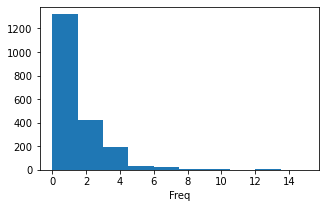

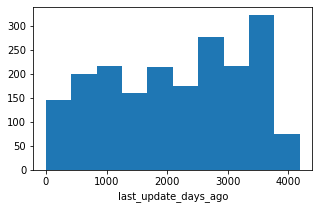

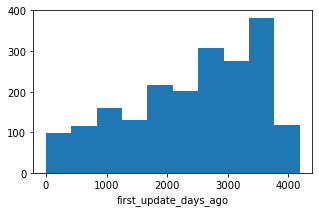

In [15]:
#Substract all numerical variables
quant_vars = ['Freq', 'last_update_days_ago','first_update_days_ago']
all_numerical_df = Tayko_df[quant_vars]

## histogram for each of the quantitative variables - Pandas
for var in quant_vars:
    fig = plt.figure(figsize = (5,3))
    plt.hist(all_numerical_df[var].dropna())
    plt.xlabel(var)
    plt.show()

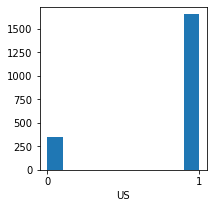

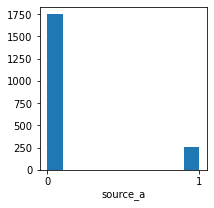

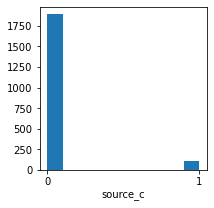

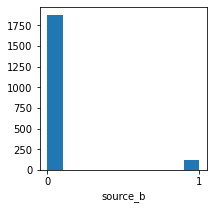

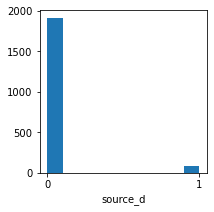

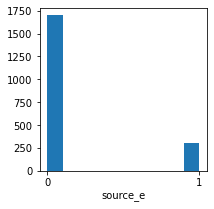

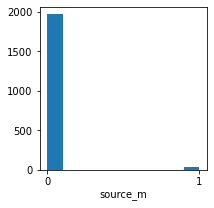

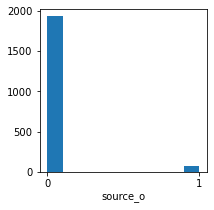

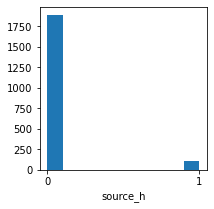

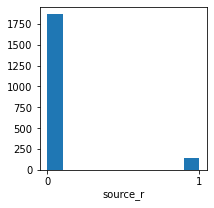

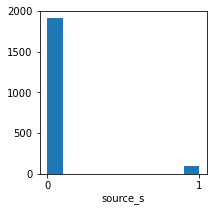

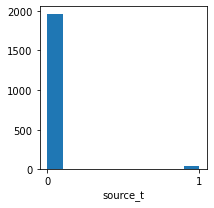

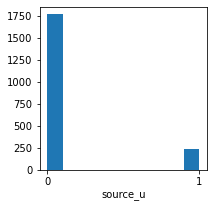

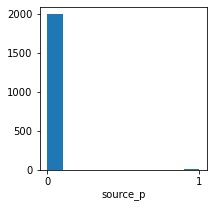

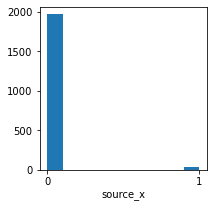

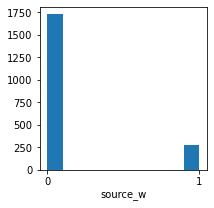

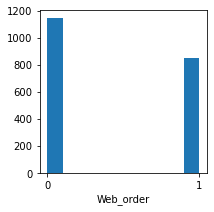

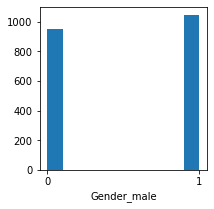

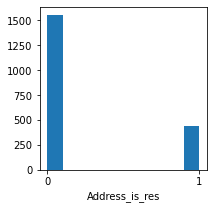

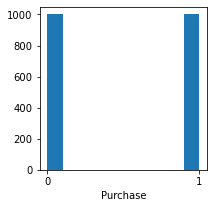

In [16]:
## histogram for all catogory variables - Pandas
excludeColumns = ('Freq', 'last_update_days_ago','first_update_days_ago')
binary_vars = [s for s in Tayko_df.columns if s not in excludeColumns]

all_binary_df =Tayko_df[binary_vars]

# histograms for catogor variables
for var in binary_vars:
    fig = plt.figure(figsize = (3,3))
    plt.hist(all_binary_df[var].dropna())
    plt.xticks(np.arange(0, 2, 1))
    plt.xlabel(var)
   
    plt.show()

From the histogram, we can get the frequency distribution of all variables. 
 For the 3 numerical variables Freq, last_update_days_ago and first_update_days_ago, we can see that the variable "last_update_days_ago" is approximately normal distributions, the "Freq" is right skewed distribution, and "first_update_days_ago" is left skewed distribution.

In terms of 20 category variables, the histogram shows the frequency distribution of 0 and 1 of each variable.

**Bar Chart**

<ipython-input-17-f4dfa5cfb603>:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0, 1], False)


Text(0, 0.5, 'Avg. last_update_days_ago')

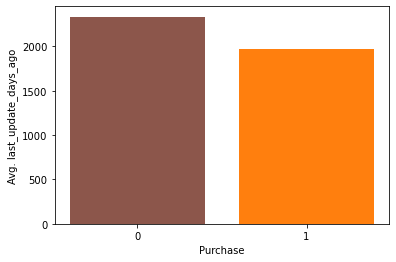

In [17]:
# compute mean last_update_days_ago per Purchase = (0, 1)
dataForPlot = Tayko_df.groupby('Purchase').mean().last_update_days_ago
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('Purchase')
ax.set_ylabel('Avg. last_update_days_ago')

last_update_days_ago seems a good predictor of the outcome variable.

<ipython-input-18-4178906c5550>:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0, 1], False)


Text(0, 0.5, 'Avg.first_update_days_ago')

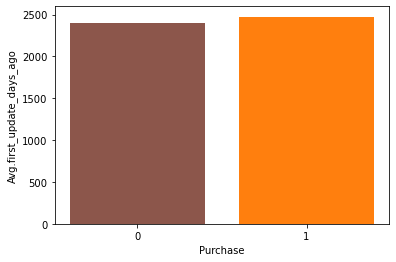

In [18]:
# compute mean first_update_days_ago per Purchase = (0, 1)
dataForPlot = Tayko_df.groupby('Purchase').mean().first_update_days_ago
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('Purchase')
ax.set_ylabel('Avg.first_update_days_ago')

first_update_days_ago may not be a good predictor of the outcome.

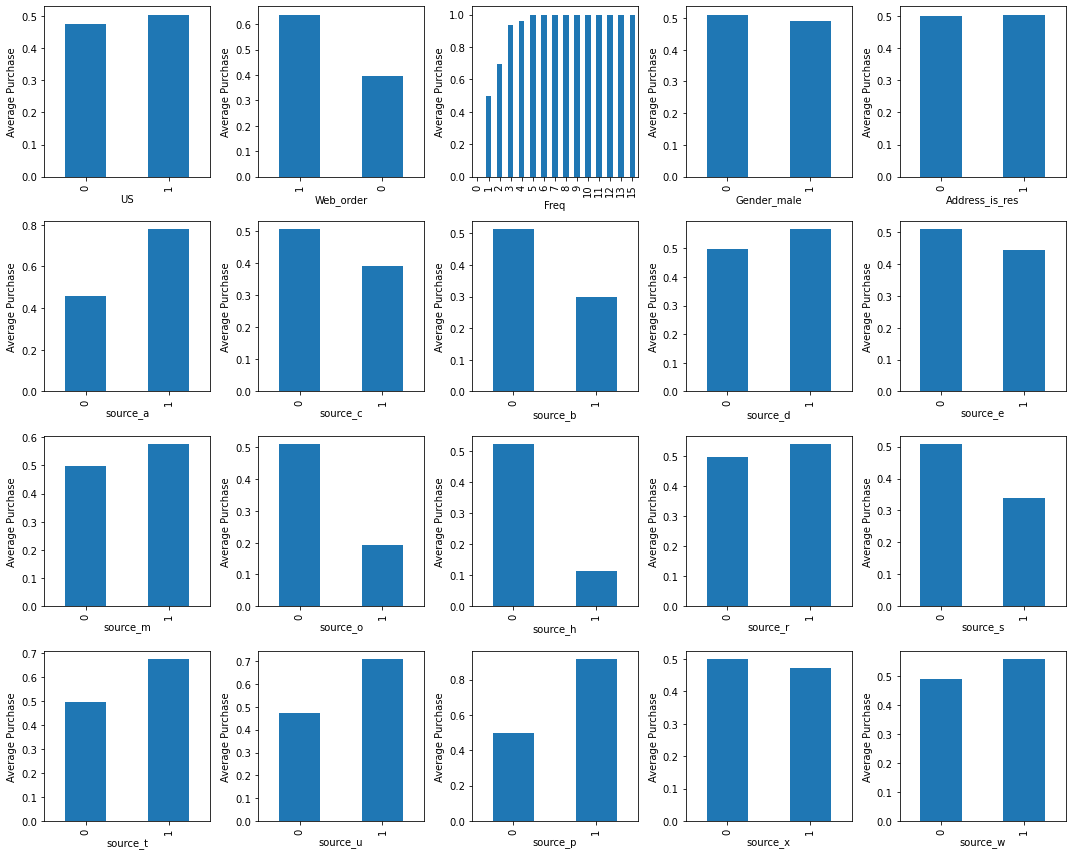

In [19]:
def createGraph(group, xlabel, axis):
    groupAverage = Tayko_df.groupby([group])['Purchase'].mean()
    if group == 'Web_order': # rotate so that display starts on Sunday
        groupAverage = groupAverage.reindex(index=np.roll(groupAverage.index,1))
        groupAverage.index = ['1', '0']
    ax = groupAverage.plot.bar(color='C0', ax=axis)
    ax.set_ylabel('Average Purchase')
    ax.set_xlabel(xlabel)
    return ax
def graphDepartureTime(xlabel, axis):
    temp_df = pd.DataFrame({'Freq': Tayko_df['Freq'],
    'Purchase': Tayko_df['Purchase']})
    groupAverage = temp_df.groupby(['Freq'])['Purchase'].mean()
    ax = groupAverage.plot.bar(color='C0', ax=axis)
    ax.set_xlabel(xlabel); ax.set_ylabel('Average Purchase')
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))
createGraph('US', 'US', axis=axes[0][0])
createGraph('Web_order', 'Web_order', axis=axes[0][1])
graphDepartureTime('Freq', axis=axes[0][2])
createGraph('Gender_male', 'Gender_male', axis=axes[0][3])
createGraph('Address_is_res', 'Address_is_res', axis=axes[0][4])
createGraph('source_a', 'source_a', axis=axes[1][0])
createGraph('source_c', 'source_c', axis=axes[1][1])
createGraph('source_b', 'source_b', axis=axes[1][2])
createGraph('source_d', 'source_d', axis=axes[1][3])
createGraph('source_e', 'source_e', axis=axes[1][4])
createGraph('source_m', 'source_m', axis=axes[2][0])
createGraph('source_o', 'source_o', axis=axes[2][1])
createGraph('source_h', 'source_h', axis=axes[2][2])
createGraph('source_r', 'source_r', axis=axes[2][3])
createGraph('source_s', 'source_s', axis=axes[2][4])
createGraph('source_t', 'source_t', axis=axes[3][0])
createGraph('source_u', 'source_u', axis=axes[3][1])
createGraph('source_p', 'source_p', axis=axes[3][2])
createGraph('source_x', 'source_x', axis=axes[3][3])
createGraph('source_w', 'source_w', axis=axes[3][4])
plt.tight_layout()

From the figure, we see that there is a larger proportion of purchases with a US address. Purchase rates also seem to differ by Web_order, by Freq, as well as by Gender_male and Address_is_res. For souece_*, we see a different distinction between purchase when souece_* = 1 and souece_* = 0.

Thus, these variables can be good predictors of the outcome variable.

**Scatterplot**

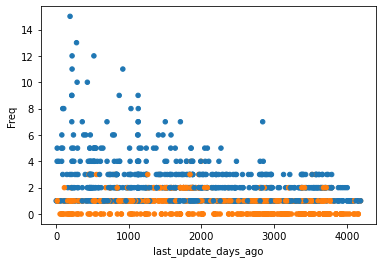

In [20]:
#Pandas - quick scatterplot 
# last_update_days_ago and Freq
Tayko_df.plot.scatter(x='last_update_days_ago', y='Freq',
c=['C0' if c == 1 else 'C1' for c in Tayko_df.Purchase])

It shows that the last_update_days_ago has a negative relationship with Freq, this means the days since the last update was made to customer record longer, the lower frequency of purchase.

In terms of the purchasers and nonpurchasers, it indicates that the purchasers have a higher frequency than nonpurchasers.

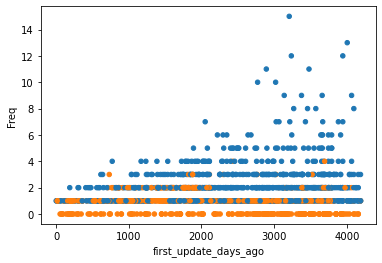

In [21]:
#Pandas - quick scatterplot 
# first_update_days_ago and Freq
Tayko_df.plot.scatter(x='first_update_days_ago', y='Freq',
c=['C0' if c == 1 else 'C1' for c in Tayko_df.Purchase])

It shows that the first_update_days_ago has a positive relationship with Freq, this means days since first update to customer record was made longer, the higher frequency of purchase.

In terms of the purchasers and nonpurchasers, it indicates that the purchasers have a higher frequency than nonpurchasers.

## b. Dimension Reduction

**Correlation table & Heatmap**

In [22]:
#correlation matrix
corr=Tayko_df.corr().round(2)

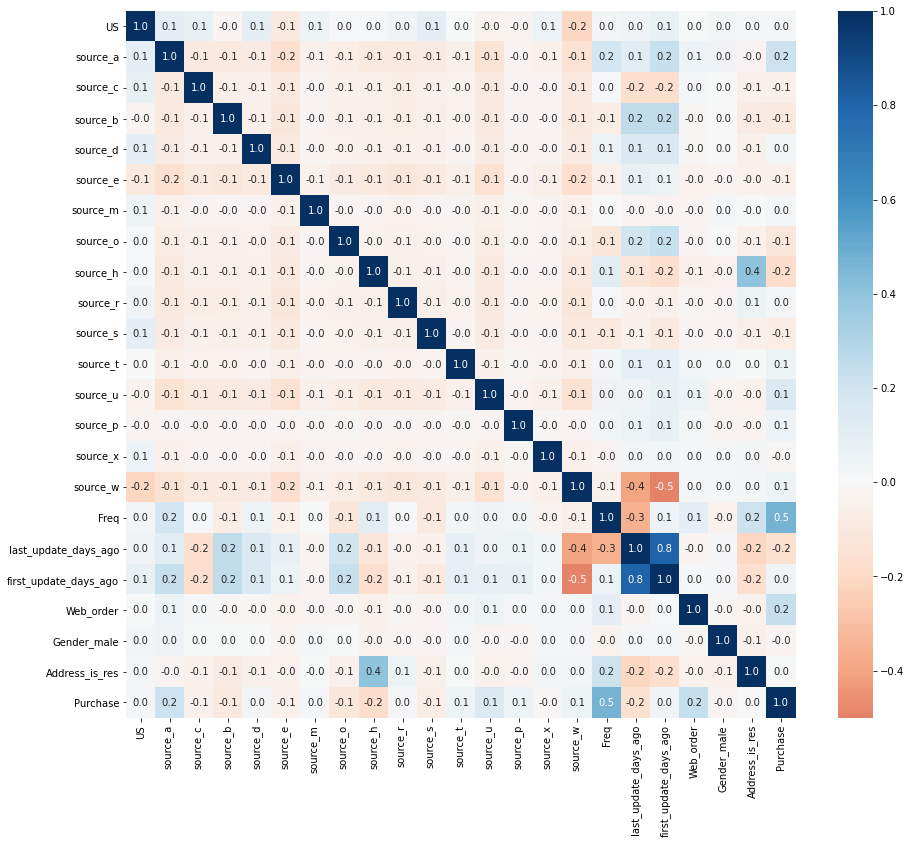

In [23]:
#heatmap using seaborn
#If the correlation between variables if greater than 0.7 we can say that the two variables are highly correlated. 
#From the above table, the pairs of highly correlated variables are:
fig, ax = plt.subplots()
fig.set_size_inches(15, 13)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
plt.savefig("mycorr.png")

Highly correlated pairs are as follows:
（Only discuss variables having correlation above 0.7 or below -0.7）

last_update_days_ago and first_update_days_ago: 0.8

According to the correlation table, we might be able to remove one variable that does not add much information to others that we keep. And as is shown in the bar chart previously, we may can remove first_update_days_ago.

**PCA**

In [24]:
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [25]:
#Perform a principal component analysis of the whole table ignoring the first three non-numerical columns
pcs = PCA()
pcs.fit(Tayko_df.dropna(axis=0))

#run summary
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,1492.2227,487.4968,1.0578,0.5286,0.4998,0.4274,0.405,0.3851,0.369,0.3479,...,0.2279,0.2229,0.2034,0.1931,0.1678,0.1514,0.1377,0.1297,0.0805,0.0506
Proportion of variance,0.9036,0.0964,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.9036,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [26]:
#generate PC weights
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
index = Tayko_df.columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
US,-0.000015,4.841103e-05,0.002079,0.006230,0.046222
source_a,-0.000039,1.364114e-04,0.038905,-0.089416,0.046677
source_c,0.000027,-1.055833e-06,-0.006393,0.004062,0.004909
source_b,-0.000042,2.018795e-06,-0.010330,0.020860,-0.002124
source_d,-0.000020,1.001424e-05,0.014251,0.004197,0.005424
source_e,-0.000016,-2.507465e-05,-0.009560,0.062030,-0.031933
source_m,0.000002,-3.997234e-06,0.001156,0.000723,0.006878
source_o,-0.000026,2.581429e-05,-0.032531,0.012783,-0.004180
source_h,0.000023,-2.995432e-05,0.035817,0.126776,-0.009467
source_r,0.000008,-2.987032e-06,0.003790,0.008456,-0.009219


Because the different variables are measured on different scales, we must first normalize the data, otherwise the variables with the largest scale will dominate the principal components. From the non-standardized output we see that the first component account for over 90% of the total variability (and the first 2 components accounts for over 100% of the total variability). Therefore, we need standardize the data.

In these results, last_update_days_ago and first_update_days_ago dominates PC1, Freq dominates PC3, Web_order and Purchase dominates PC4, Gender=male dominates PC5, Hence their variance will be a dominant component of the total variance.
We can normalize each variable to remove scale effect.

In [27]:
#Normalizing the data
pcs = PCA()
pcs.fit(preprocessing.scale(Tayko_df.dropna(axis=0)))

PCA()

In [28]:
#run summary again
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,1.6050,1.3696,1.2255,1.1412,1.0754,1.0723,1.0389,1.0353,1.0297,1.0284,...,1.0077,0.983,0.9538,0.9165,0.8682,0.7680,0.6744,0.6429,0.2953,0.2157
Proportion of variance,0.1119,0.0815,0.0653,0.0566,0.0503,0.0500,0.0469,0.0466,0.0461,0.0460,...,0.0441,0.042,0.0395,0.0365,0.0328,0.0256,0.0198,0.0180,0.0038,0.0020
Cumulative proportion,0.1119,0.1935,0.2587,0.3153,0.3656,0.4155,0.4624,0.5090,0.5551,0.6011,...,0.7800,0.822,0.8616,0.8981,0.9308,0.9565,0.9762,0.9942,0.9980,1.0000


In [29]:
#generate PC weights
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=Tayko_df.columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
US,-0.077235,0.123109,0.226120,0.570840,0.048756
source_a,-0.112294,0.368004,0.035046,0.127336,0.108417
source_c,0.107733,-0.049625,-0.037860,0.396946,0.100492
source_b,-0.210687,-0.095976,0.000081,-0.136042,-0.280156
source_d,-0.111727,0.075146,0.045483,0.147527,-0.010580
source_e,-0.066131,-0.115653,-0.045882,-0.313187,0.794098
source_m,0.012919,0.005530,0.011338,0.134796,0.014262
source_o,-0.179225,-0.130833,0.033018,-0.016280,-0.204735
source_h,0.168218,-0.067059,0.611396,-0.167610,-0.115886
source_r,0.038541,0.016300,0.072140,0.104544,-0.024832


After the standerlazition, the first 18 components account for 93% of the total variance, so using 18-19 components to explain the whole 23 variables.

## 3. The Logistic Regression

In [30]:
Tayko_df

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,first_update_days_ago,Web_order,Gender_male,Address_is_res,Purchase
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,3662,3662,1,0,1,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2900,2900,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3883,3914,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,829,829,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,869,869,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1701,1701,1,0,0,1
1996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2633,2633,1,1,0,1
1997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3394,3394,0,0,0,0
1998,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,253,253,0,1,1,0


In [31]:
#aggregation of Purchase variable
Tayko_df.Purchase.value_counts()

1    1000
0    1000
Name: Purchase, dtype: int64

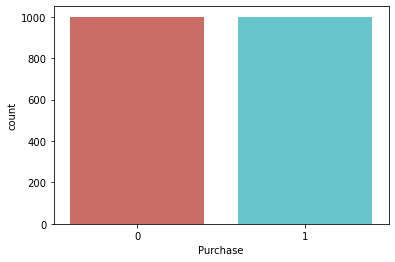

<Figure size 432x288 with 0 Axes>

In [32]:
sns.countplot(x='Purchase', data=Tayko_df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [33]:
#Percentage of purchaser and nonpurchaser
count_no_sub = len(Tayko_df[Tayko_df['Purchase']==0])
count_sub = len(Tayko_df[Tayko_df['Purchase']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no purchaser is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of purchaser", pct_of_sub*100)

percentage of no purchaser is 50.0
percentage of purchaser 50.0


The dataset for this case includes just 1000 purchasers and 1000
nonpurchasers, an apparent response rate of 0.5. Therefore, after using the dataset to predict who will be a purchaser, we must adjust the purchase rate back down by multiplying each case’s “probability of purchase” by 0.053/0.5, or 0.107.

In [34]:
y = Tayko_df['Purchase']
X = Tayko_df.drop(columns=['Purchase'])

In [35]:
# Partition the data on the whole data set randomly into a training set 60% validation set 40%
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [36]:
#Run quick descriptive stats for validation dataset
train_X.describe()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,first_update_days_ago,Web_order,Gender_male,Address_is_res
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.825000,0.128333,0.062500,0.058333,0.040833,0.171667,0.01750,0.035833,0.044167,0.065000,...,0.105833,0.008333,0.015833,0.130833,1.416667,2143.309167,2445.004167,0.404167,0.514167,0.221667
std,0.380126,0.334600,0.242162,0.234470,0.197986,0.377248,0.13118,0.185952,0.205551,0.246629,...,0.307752,0.090944,0.124882,0.337359,1.420588,1151.831576,1077.501643,0.490935,0.500008,0.415541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1120.750000,1710.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2281.000000,2714.500000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,3126.000000,3339.250000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000


In [37]:
train_y.describe()

count    1200.000000
mean        0.484167
std         0.499958
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Purchase, dtype: float64

In [38]:
#Run quick descriptive stats for validation and training dataset
valid_X.describe()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,first_update_days_ago,Web_order,Gender_male,Address_is_res
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.823750,0.123750,0.046250,0.062500,0.042500,0.120000,0.015000,0.030000,0.06500,0.073750,...,0.138750,0.002500,0.021250,0.147500,1.417500,2172.788750,2421.497500,0.458750,0.540000,0.220000
std,0.381271,0.329502,0.210157,0.242213,0.201853,0.325165,0.121628,0.170694,0.24668,0.261527,...,0.345902,0.049969,0.144307,0.354825,1.384048,1125.810625,1078.948244,0.498607,0.498709,0.414505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1169.500000,1611.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2280.000000,2725.500000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,3146.500000,3359.250000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,12.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000


In [39]:
valid_y.describe()

count    800.000000
mean       0.523750
std        0.499748
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Purchase, dtype: float64

In [40]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, 
   solver='liblinear')
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [41]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
   index=X.columns).transpose())
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = 
   len(train_X.columns) + 1))

intercept  -3.3524253933503374
             US  source_a  source_c  source_b  source_d  source_e  source_m  \
coeff  0.244289  1.647094  -0.56125 -0.311614  0.167598   0.37996  0.981323   

       source_o  source_h  source_r  ...  source_u  source_p  source_x  \
coeff  0.697839 -3.537767  0.965342  ...  1.691005   1.99895  1.105712   

       source_w      Freq  last_update_days_ago  first_update_days_ago  \
coeff  0.767149  2.180981              0.000166              -0.000274   

       Web_order  Gender_male  Address_is_res  
coeff   0.965675    -0.234322       -0.529822  

[1 rows x 22 columns]
AIC 951.9992649295939


In [42]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
   index=X.columns))

intercept  -3.3524253933503374
                          coeff
US                     0.244289
source_a               1.647094
source_c              -0.561250
source_b              -0.311614
source_d               0.167598
source_e               0.379960
source_m               0.981323
source_o               0.697839
source_h              -3.537767
source_r               0.965342
source_s              -0.000980
source_t               0.863861
source_u               1.691005
source_p               1.998950
source_x               1.105712
source_w               0.767149
Freq                   2.180981
last_update_days_ago   0.000166
first_update_days_ago -0.000274
Web_order              0.965675
Gender_male           -0.234322
Address_is_res        -0.529822


In [43]:
print(pd.DataFrame({'Odds': np.exp(logit_reg.coef_[0])}, index=X.columns))

                           Odds
US                     1.276713
source_a               5.191872
source_c               0.570495
source_b               0.732264
source_d               1.182461
source_e               1.462226
source_m               2.667983
source_o               2.009406
source_h               0.029078
source_r               2.625685
source_s               0.999020
source_t               2.372301
source_u               5.424932
source_p               7.381301
source_x               3.021376
source_w               2.153618
Freq                   8.854985
last_update_days_ago   1.000166
first_update_days_ago  0.999726
Web_order              2.626561
Gender_male            0.791107
Address_is_res         0.588710


In [44]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0], 'Odds': np.exp(logit_reg.coef_[0])}, index=X.columns))

intercept  -3.3524253933503374
                          coeff      Odds
US                     0.244289  1.276713
source_a               1.647094  5.191872
source_c              -0.561250  0.570495
source_b              -0.311614  0.732264
source_d               0.167598  1.182461
source_e               0.379960  1.462226
source_m               0.981323  2.667983
source_o               0.697839  2.009406
source_h              -3.537767  0.029078
source_r               0.965342  2.625685
source_s              -0.000980  0.999020
source_t               0.863861  2.372301
source_u               1.691005  5.424932
source_p               1.998950  7.381301
source_x               1.105712  3.021376
source_w               0.767149  2.153618
Freq                   2.180981  8.854985
last_update_days_ago   0.000166  1.000166
first_update_days_ago -0.000274  0.999726
Web_order              0.965675  2.626561
Gender_male           -0.234322  0.791107
Address_is_res        -0.529822  0.588710


**For numerical variables：**

**Freq:** If one unit of Freq increase and all the other variables are constant, in that case odds of purchasing goes up by the multiplication of 8.854985;

**last_update_days_ago:** If one unit of last_update_days_ago increases and all the other variables are constant, in that case the odds of purchasing increases by 1.000166 times;

**first_update_days_ago:** If one unit of first_update_days_ago increase and all the other variables are constant, in that case odds of purchasing goes down by the multiplication of 0.999726;


**For category variables：**

**US:** If it is a US address and all the other variables are constant， then the odds of purchasing is 1.276713 times more.

**Predict the model on validation dataset**

In [45]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

In [46]:
logit_result

,actual,p(0),p(1),predicted
674,0,9.609708e-01,0.039029,0
1699,1,5.059006e-02,0.949410,1
1282,0,4.784349e-01,0.521565,1
1315,1,1.294671e-08,1.000000,1
1210,0,9.091932e-01,0.090807,0
...,...,...,...,...
1816,0,9.105501e-01,0.089450,0
390,1,5.364416e-01,0.463558,0
1992,1,2.494266e-01,0.750573,1
78,1,3.325376e-01,0.667462,1


Confusion Matrix

In [47]:
classificationSummary(train_y, logit_reg.predict(train_X))

Confusion Matrix (Accuracy 0.8108)

       Prediction
Actual   0   1
     0 512 107
     1 120 461


In [48]:
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8187)

       Prediction
Actual   0   1
     0 321  60
     1  85 334


Accuracy 0.8187: we get an accuracy of 82% or 81% as well, which means that the model is actually working quite well in the validation data set.

**Show some use of statsmodel**

In [49]:
# same initial preprocessing and creating dummies
# add constant column
Tayko_df = sm.add_constant(Tayko_df, prepend=True)
y = Tayko_df['Purchase']
X = Tayko_df.drop(columns=['Purchase'])
# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
random_state=1)
# use GLM (general linear model) with the binomial family to fit a logistic regression
logit_reg = sm.GLM(train_y, train_X, family=sm.families.Binomial())
logit_result = logit_reg.fit()
logit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Purchase   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1177
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -487.05
Date:                Fri, 09 Apr 2021   Deviance:                       974.10
Time:                        17:19:19   Pearson chi2:                 1.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.7809      0.608     -6.214      0.000      -4.973      -2.588
US                        0.2673      0.217      1.229      0.219      -0.159       0.694
source_a                  1.9702      0.569      3.460      0.001       0.854       3.086
source_c                 -0.2051      0.604     -0.340      0.734      -1.388       0.978
source_b                  0.0134      0.668      0.020      0.984      -1.296       1.323
source_d                  0.5120      0.643      0.796      0.426      -0.748       1.772
source_e                  0.7255      0.544      1.334      0.182      -0.341       1.792
source_m                  1.3361      0.761      1.755      0.079      -0.156       2.828
source_o                  0.9711      0.735      1.322      0.186      -0.469       2.411
source_h                 -3.2506      0.798     -4.071      0.000      -4.815      -1.686
source_r                  1.3499      0.592      2.281      0.023       0.190       2.510
source_s                  0.4047      0.638      0.635      0.526      -0.845       1.655
source_t                  1.2416      0.688      1.804      0.071      -0.107       2.590
source_u                  2.0508      0.564      3.634      0.000       0.945       3.157
source_p                  2.2312      1.298      1.719      0.086      -0.313       4.776
source_x                  1.4557      0.764      1.905      0.057      -0.042       2.953
source_w                  1.1602      0.555      2.091      0.037       0.073       2.248
Freq                      2.1996      0.170     12.945      0.000       1.867       2.533
last_update_days_ago      0.0002      0.000      0.852      0.394      -0.000       0.001
first_update_days_ago    -0.0003      0.000     -1.249      0.212      -0.001       0.000
Web_order                 0.9735      0.162      5.993      0.000       0.655       1.292
Gender_male              -0.2348      0.160     -1.463      0.144      -0.549       0.080
Address_is_res           -0.5520      0.224     -2.465      0.014      -0.991      -0.113
=========================================================================================
"""

## Part 2_Linear Regression to Predict Spending of Purchaser

## 1. Data Preparation

In [50]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [51]:
car_df = pd.read_csv('Tayko.csv')

In [52]:
Subset = car_df[car_df["Purchase"] > 0]

In [53]:
Subset

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
8,9,1,1,0,0,0,0,0,0,0,...,0,0,4,525,2914,1,1,0,1,489
9,10,1,1,0,0,0,0,0,0,0,...,0,0,1,3215,3215,0,0,0,1,174
13,14,1,1,0,0,0,0,0,0,0,...,0,0,5,2081,2438,0,1,0,1,1416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1992,1,0,0,0,0,0,0,0,0,...,0,0,1,2807,2807,0,1,0,1,55
1992,1993,1,0,0,0,0,0,0,1,0,...,0,0,2,2466,3747,0,1,0,1,133
1994,1995,1,0,0,0,0,1,0,0,0,...,0,0,2,1136,1400,0,1,0,1,184
1995,1996,1,0,0,0,0,0,0,0,0,...,0,0,1,1701,1701,1,0,0,1,30


In [54]:
Subset.dtypes

sequence_number         int64
US                      int64
source_a                int64
source_c                int64
source_b                int64
source_d                int64
source_e                int64
source_m                int64
source_o                int64
source_h                int64
source_r                int64
source_s                int64
source_t                int64
source_u                int64
source_p                int64
source_x                int64
source_w                int64
Freq                    int64
last_update_days_ago    int64
1st_update_days_ago     int64
Web order               int64
Gender=male             int64
Address_is_res          int64
Purchase                int64
Spending                int64
dtype: object

In [55]:
pd.set_option('display.max_columns', None)
Subset.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3662,3662,1,0,1,1,128
2,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3883,3914,0,0,0,1,127
8,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,525,2914,1,1,0,1,489
9,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3215,3215,0,0,0,1,174
13,14,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2081,2438,0,1,0,1,1416


In [56]:
Subset.isnull().sum()

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64

## 2.Data Reduction

**PCA**

In [57]:
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [58]:
predictors = ['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e', 'source_m', 
              'source_o', 'source_h', 'source_r','source_s', 'source_t','source_u','source_p','source_x','source_w','Freq','last_update_days_ago','1st_update_days_ago','Web order','Gender=male','Address_is_res','Purchase']
outcome = 'Spending'

In [59]:
X = pd.get_dummies(Subset[predictors], drop_first=True)
y = Subset[outcome]

In [60]:
predictors_df = X
predictors_df.columns

Index(['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase'],
      dtype='object')

In [61]:
pcs = PCA()
pcs.fit(predictors_df.dropna(axis=0))

#run summary
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,1396.6463,605.2570,1.1544,0.5116,0.4924,0.4283,0.4083,0.3845,0.366,0.3409,0.284,0.232,0.211,0.1935,0.1826,0.1726,0.143,0.1321,0.1158,0.1081,0.1036,0.0277,0.0
Proportion of variance,0.8419,0.1581,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Cumulative proportion,0.8419,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.000,1.000,1.000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0


In [62]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
index = predictors_df.columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
US,-0.000034,0.000052,-0.006395,-0.108644,0.025501
source_a,-0.000069,0.000107,0.000853,-0.145691,-0.002690
source_c,0.000006,0.000024,-0.008528,-0.006892,-0.013298
source_b,-0.000022,0.000018,0.004183,0.020922,-0.004162
source_d,-0.000022,0.000006,0.008829,0.009661,-0.002334
source_e,0.000009,-0.000021,0.011249,0.085476,0.012806
source_m,0.000009,-0.000008,0.002238,0.000831,0.011450
source_o,-0.000007,0.000029,-0.014264,0.005270,-0.000242
source_h,0.000006,-0.000003,0.009408,0.009099,-0.015455
source_r,-0.000001,-0.000006,0.009246,-0.009717,0.007127


In [63]:
pcs = PCA()
pcs.fit(preprocessing.scale(predictors_df.dropna(axis=0)))

PCA()

In [64]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,1.5463,1.2072,1.1364,1.0895,1.0770,1.0589,1.0458,1.0404,1.0335,1.0234,1.0167,1.0138,1.0126,1.0090,0.9921,0.9741,0.9505,0.9089,0.8727,0.6757,0.3506,0.1163,0.0
Proportion of variance,0.1086,0.0662,0.0586,0.0539,0.0527,0.0509,0.0497,0.0492,0.0485,0.0476,0.0469,0.0467,0.0466,0.0462,0.0447,0.0431,0.0410,0.0375,0.0346,0.0207,0.0056,0.0006,0.0
Cumulative proportion,0.1086,0.1748,0.2334,0.2873,0.3400,0.3909,0.4405,0.4897,0.5382,0.5858,0.6327,0.6794,0.7259,0.7722,0.8169,0.8599,0.9010,0.9385,0.9731,0.9938,0.9994,1.0000,1.0


In [65]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=pcsSummary_df.columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
PC1,-0.207767,0.144182,-0.366693,-0.018991,0.356716
PC2,-0.255506,0.175028,-0.497961,0.001734,-0.546806
PC3,0.015578,0.060974,-0.140644,0.074448,0.213187
PC4,-0.130053,0.052119,0.151082,-0.098027,0.101282
PC5,-0.128394,0.008170,0.010641,-0.109719,0.305140
PC6,0.046280,0.034432,0.392088,-0.506732,-0.227914
PC7,0.064056,0.077259,-0.100439,-0.025221,0.260750
PC8,-0.067810,0.030938,0.065568,-0.020886,0.015119
PC9,0.075097,0.324045,0.177445,0.078741,0.035109
PC10,-0.006834,0.061005,-0.011392,-0.031054,0.298774


## 3. The Linear Regression

## a.use all independent variables to develop the original model.

In [66]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [67]:
car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

LinearRegression()

In [68]:
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

intercept  88.30778761904318
               Predictor  coefficient
0                     US    -4.787858
1               source_a    33.355388
2               source_c   -50.895141
3               source_b   -21.249509
4               source_d   -10.435042
5               source_e    -1.452372
6               source_m   -74.468019
7               source_o    32.552540
8               source_h  -167.833939
9               source_r    57.681294
10              source_s   -33.916698
11              source_t   -26.878828
12              source_u    25.714261
13              source_p     8.554854
14              source_x   -12.370184
15              source_w    -4.917695
16                  Freq    94.683334
17  last_update_days_ago     0.000615
18   1st_update_days_ago    -0.029987
19             Web order     5.992520
20           Gender=male     7.364279
21        Address_is_res   -77.872405
22              Purchase     0.000000


In [69]:
regressionSummary(train_y, car_lm.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 156.6754
            Mean Absolute Error (MAE) : 98.1824
          Mean Percentage Error (MPE) : -99.5626
Mean Absolute Percentage Error (MAPE) : 132.3070


In [70]:
pred_y = car_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, car_lm))
print('AIC : ', AIC_score(train_y, pred_y, car_lm))
print('BIC : ', BIC_score(train_y, pred_y, car_lm))

adjusted r2 :  0.4213920253414475
AIC :  7817.737635834876
BIC :  7927.6608772152795


In [71]:
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - car_lm_pred})
print(result.head(20))

       Predicted  Actual    Residual
963   288.428243     104 -184.428243
1599  415.933504     655  239.066496
850   420.176371     253 -167.176371
667   113.120313      98  -15.120313
422   158.385811      83  -75.385811
1854  241.988487      42 -199.988487
453   128.490639     135    6.509361
1587  211.392043      69 -142.392043
570   212.763987     153  -59.763987
104   178.620051     164  -14.620051
836   336.780059     232 -104.780059
252    90.229313     141   50.770687
1948  140.704435      91  -49.704435
620   164.911612      57 -107.911612
1953  199.292089     248   48.707911
237   131.830328     130   -1.830328
193   124.999132      80  -44.999132
18    150.678922     130  -20.678922
1156   88.012015     306  217.987985
945    99.590721     136   36.409279


In [72]:
regressionSummary(valid_y, car_lm_pred)


Regression statistics

                      Mean Error (ME) : 4.6401
       Root Mean Squared Error (RMSE) : 170.3900
            Mean Absolute Error (MAE) : 104.5163
          Mean Percentage Error (MPE) : -67.4407
Mean Absolute Percentage Error (MAPE) : 100.9832


In [73]:
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

1.0


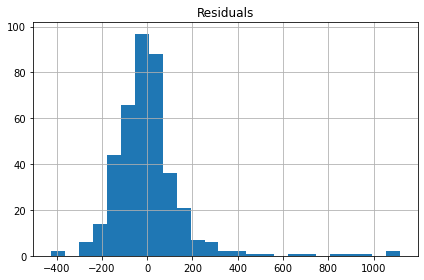

In [74]:
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.tight_layout()
plt.savefig("myexample.png")

In [75]:
predictors_df = X
predictors_df.columns

Index(['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase'],
      dtype='object')

## b.Modify the model with predictors selecting.

**Backward Elimination**

In [76]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: US, source_a, source_c, source_b, source_d, source_e, source_m, source_o, source_h, source_r, source_s, source_t, source_u, source_p, source_x, source_w, Freq, last_update_days_ago, 1st_update_days_ago, Web order, Gender=male, Address_is_res, Purchase
Start: score=7817.74
Step: score=7815.74, remove Purchase
Step: score=7813.74, remove source_e
Step: score=7811.74, remove last_update_days_ago
Step: score=7809.76, remove source_w
Step: score=7807.79, remove source_p
Step: score=7805.83, remove source_x
Step: score=7803.88, remove source_d
Step: score=7801.99, remove US
Step: score=7800.20, remove Web order
Step: score=7798.45, remove source_b
Step: score=7796.72, remove source_t
Step: score=7795.03, remove Gender=male
Step: score=7793.50, remove source_o
Step: score=7792.09, remove source_s
Step: score=7791.61, remove source_c
Step: score=7791.19, remove source_m
Step: score=7791.19, remove None
['source_a', 'source_h', 'source_r', 'source_u', 'Freq', '1st_update_days_ago', '

In [77]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 4.1171
       Root Mean Squared Error (RMSE) : 169.0312
            Mean Absolute Error (MAE) : 102.8035
          Mean Percentage Error (MPE) : -69.6319
Mean Absolute Percentage Error (MAPE) : 101.1441


**Forward Elimination**

In [78]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: US, source_a, source_c, source_b, source_d, source_e, source_m, source_o, source_h, source_r, source_s, source_t, source_u, source_p, source_x, source_w, Freq, last_update_days_ago, 1st_update_days_ago, Web order, Gender=male, Address_is_res, Purchase
Start: score=8123.51, constant
Step: score=7834.90, add Freq
Step: score=7814.54, add Address_is_res
Step: score=7802.53, add 1st_update_days_ago
Step: score=7799.38, add source_r
Step: score=7796.08, add source_a
Step: score=7792.91, add source_u
Step: score=7791.19, add source_h
Step: score=7791.19, add None
['Freq', 'Address_is_res', '1st_update_days_ago', 'source_r', 'source_a', 'source_u', 'source_h']


In [79]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 4.1171
       Root Mean Squared Error (RMSE) : 169.0312
            Mean Absolute Error (MAE) : 102.8035
          Mean Percentage Error (MPE) : -69.6319
Mean Absolute Percentage Error (MAPE) : 101.1441


**c. Stepwise**

In [80]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: US, source_a, source_c, source_b, source_d, source_e, source_m, source_o, source_h, source_r, source_s, source_t, source_u, source_p, source_x, source_w, Freq, last_update_days_ago, 1st_update_days_ago, Web order, Gender=male, Address_is_res, Purchase
Start: score=8123.51, constant
Step: score=7834.90, add Freq
Step: score=7814.54, add Address_is_res
Step: score=7802.53, add 1st_update_days_ago
Step: score=7799.38, add source_r
Step: score=7796.08, add source_a
Step: score=7792.91, add source_u
Step: score=7791.19, add source_h
Step: score=7791.19, unchanged None
['Freq', 'Address_is_res', '1st_update_days_ago', 'source_r', 'source_a', 'source_u', 'source_h']


In [81]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 4.1171
       Root Mean Squared Error (RMSE) : 169.0312
            Mean Absolute Error (MAE) : 102.8035
          Mean Percentage Error (MPE) : -69.6319
Mean Absolute Percentage Error (MAPE) : 101.1441
